# Data visualisation using Matplotlib

## Importing matplotlib

The matplotlib library can be imported using any of the import techniques we have seen. As pandas is generally imported with import panas as pd, you will find that matplotlib is most commonly imported with import matplotlib as plt where ‘plt’ is the alias.

In addition to importing the library, in a Jupyter notebook environment we need to tell Jupyter that when we produce a graph we want it to be display the graph in a cell in the notebook just like any other results. To do this we use the %matplotlib inline directive.

If you forget to do this, you will have to add plt.show() to see the graphs.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

## Numpy

Numpy is another Python library. It is used for multi-dimensional array processing. In our case we just want to use it for its useful random number generation functions which we will use to create some fake data to demonstrate some of the graphing functions of matplotlib.

We will use the alias np, following convention.



## Bar charts

will generate 20 random numbers between 0 and 1.

We are using these to create a pandas Series of values.

A bar chart only needs a single set of values. Each ‘bar’ represents the value from the Series of values. A pandas Series (and a Dataframe) have a method called ‘plot’. We only need to tell plot what kind of graph we want.

The ‘x’ axis represents the index values of the Series

In [7]:
import numpy as np
import pandas as pd

np.random.seed(12345) ## set a seed value to ensure reproducibility of the plots
s = pd.Series(np.random.rand(20))

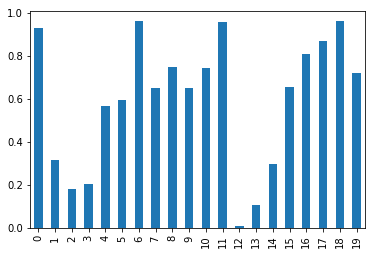

In [8]:
# plot the chart bar
s.plot(kind='bar')

Internally the pandas ‘plot’ method has called the ‘bar’ method of matplotlib and provided a set of parameters, including the pandas.Series s to generate the graph.

We can use matplotlib directly to produce a similar graph. In this case we need to pass two parameters, the number of bars we need and the pandas Series holding the values.

We also have to explicitly call the show() function to produce the graph.

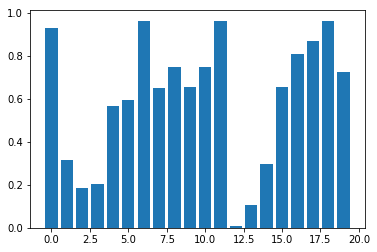

In [15]:
plt.bar(range(len(s)), s)
plt.show()

### Exercise

Compare the two graphs we have just drawn. How do they differ? Are the differences significant?

## Histogram

We can plot histograms in a similar way, directly from pandas and also from Matplotlib

The pandas way

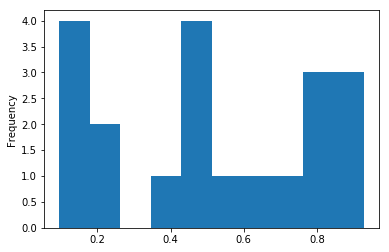

In [17]:
s = pd.Series(np.random.rand(20))

# plot the bar chart
s.plot(kind='hist')

and the matplotlib way

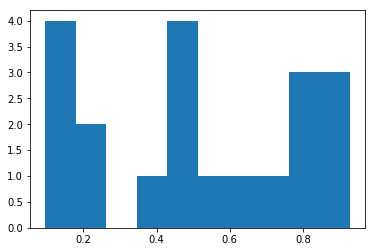

In [18]:
plt.hist(s)
plt.show()

For the Histogram, each data point is allocated to 1 of 10 (by default) equal ‘bins’ of equal size (range of numbers) which are indicated along the x axis and the number of points (frequency) is shown on the y axis.

In this case the graphs are almost identical. The only difference being in the first graph the y axis has a label ‘Frequency’ associated with it.

We can fix this with a call to the ylabel function

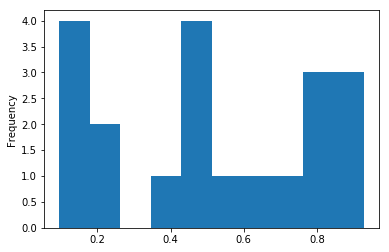

In [20]:
plt.ylabel('Frequency')
plt.hist(s)
plt.show()

In general most graphs can be broken down into a series of elements which, although typically related in some way, can all exist independently of each other. This allows us to create the graph in a rather piecemeal fashion.

The labels (if any) on the x and y axis are independent of the data values being represented. The title and the legend are also independent objects within the overall graph.

In matplotlib you create the graph by providing values for all of the individual components you choose to include. When you are ready, you call the show function.

Using this same approach we can plot two sets of data on the same graph

We will use a scatter plot to demonstrate some of the available features.

For a scatter plot we need two sets of data points one for the x values and the other for the y values.



## Scatter plot

The scatter plot requires the x and y coordinates of each of the points being plotted. To provide this we will generate two series of random data one for the x coordinates and the other for the y coordinates

We will generate two sets of points and plot them on the same graph.

We will also add other common features like a title, a legend and labels on the x and y axis.

In [22]:
# Generate some date for 2 sets of points.
x1 = pd.Series(np.random.rand(20) - 0.5)
y1 = pd.Series(np.random.rand(20) - 0.5)

x2 = pd.Series(np.random.rand(20) - 0.5)
y2 = pd.Series(np.random.rand(20) - 0.5)

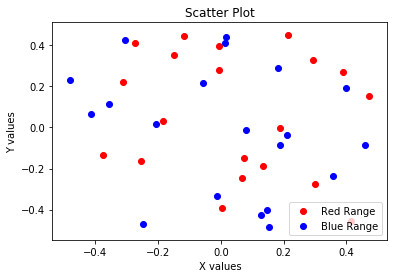

In [23]:
# Add some features
plt.title('Scatter Plot')
plt.xlabel('X values')
plt.ylabel('Y values')

# plot the points in a scatter plot
plt.scatter(x1,y1, c='red', label='Red Range' )  # 'c' parameter is the colour and 'label' is the text for the legend
plt.scatter(x2, y2, c='blue', label='Blue Range')

plt.legend(loc=4) # the locations 1,2,3 and 4 are top-right, top-left, bottom-left and bottom-right

# Show the graph with the two sets of points
plt.show()

In the call to the scatter method, the label parameter values are used by the legend. The c or color parameter can be set to any color matplotlib recognises. Full details of the available colours are available in the matplotlib website. The markers section will tell you what markers you can use instead of the default ‘dots’. There is also an s (size) parameter which allows you to change the size of the marker.

### Exercise

In the scatterplot the s parameter determines the size of the dots. s can be a simple numeric value, say s=100, which will produce dots all of the same size. However you can pass a list of values (or a pandas Series) to provide sizes for the individual dots. This approach is very common as it allows us to provide an extra variable worth of information on the graph.

    1. Modify the code we used for the scatter plot to include a size value for each of the points in the series being plotted. (The downside is that some of the smaller dots may be completely covered by the larger dots. To try and highlight when this has happened we can change the opacity of the dots.)

    2. Find out which parameter controls the opacity of the dots ( clue - it is not called opacity), add it to you code and set it > to a reasonable value .

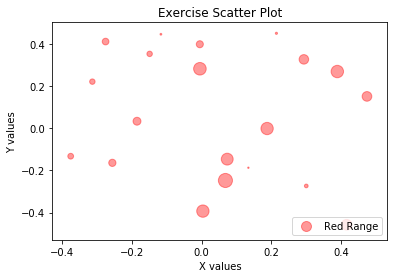

In [32]:
plt.title('Exercise Scatter Plot')
plt.xlabel('X values')
plt.ylabel('Y values')

z1 = pd.Series(np.random.rand(20)*200 )


plt.scatter(x1, y1, s=z1, c='red', label='Red Range', alpha=0.4)

plt.legend(loc=4)
plt.show()

## Boxplot

A boxplot provides a simple representation of a variety of statistical qualities of a single set of data values.

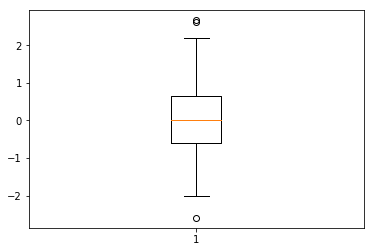

In [35]:
x = pd.Series(np.random.standard_normal(256))

# Show a boxplot of the data
plt.boxplot(x)
plt.show()

A common use of the boxplot is to compare the statistical variations across a set of variables.

The variables can be an independent series or columns of a Dataframe.

In [36]:
df = pd.DataFrame(np.random.normal(size=(100,5)), columns=list('ABCDE')) # creating a Dataframe directly with pandas
df

,A,B,C,D,E
0,1.878556,1.260240,0.310051,0.106402,0.248013
1,-1.393840,-0.669436,-0.566791,-0.381779,-0.946547
2,-1.065103,-1.331826,-0.986453,-0.378391,0.764712
3,0.060359,0.618510,-0.484921,-0.280530,0.406963
4,1.025188,0.254752,0.087524,0.070698,-0.573153
5,1.228926,-0.962202,1.525557,0.827283,0.912470
6,-0.127292,0.634317,-1.530898,-1.290701,-0.526228
7,-1.132234,-0.499797,-0.728463,-0.583144,0.329291
8,-0.826861,-0.536868,-0.562980,0.918405,-0.079399
9,-0.278625,-0.130460,-1.396998,-0.244714,0.830254


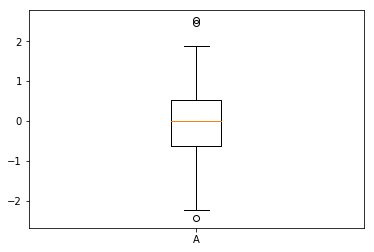

In [39]:
plt.boxplot(df.A, labels='A')
plt.show()

### Exercise

Can you change the code above so that columns A , C and D are all displayed on the same graph?

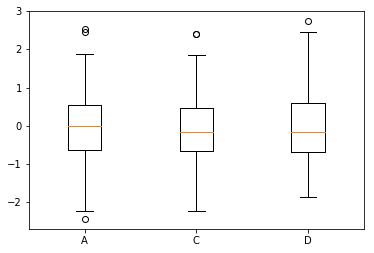

In [44]:
df_exercise = pd.DataFrame(np.random.normal(size=(100,5)), columns=list('ABCDE'))

plt.boxplot([df.A, df.C, df.D], labels=['A', 'C', 'D'])
plt.show()

The boxplot function cannot accept a whole Dataframe. The code

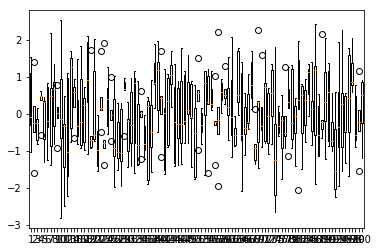

In [45]:
df = pd.DataFrame(np.random.normal(size=(100,5)), columns=list('ABCDE'))
plt.boxplot(df)  # WILL FAIL!! cannot accept a whole Dataframe
plt.show()

will fail.

However we can use the pandas plot method

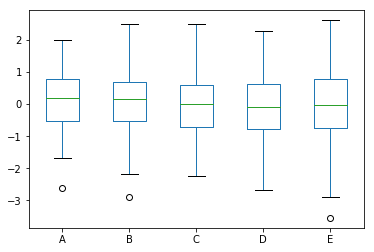

In [46]:
df = pd.DataFrame(np.random.normal(size=(100,5)), columns=list('ABCDE'))
df.plot(kind='box', return_type='axes') # the return_type='axes' is only needed for forward compatibility


We can add a title to the above by adding the title parameter. However there are no parameters for adding the axis labels. To add labels we can use matplotlib directly.

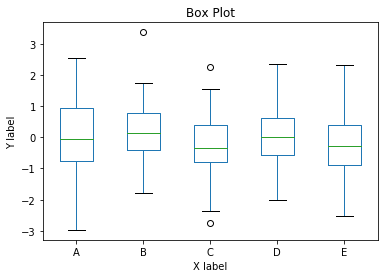

In [47]:
df = pd.DataFrame(np.random.normal(size=(100,5)), columns=list('ABCDE'))
df.plot(kind='box', return_type='axes')

plt.title('Box Plot')
plt.xlabel('X label')
plt.ylabel('Y label')
plt.show()

## Saving a graph

If you wish to save your graph as an image you can do so using the savefig() function. 

The image can be saved as a pdf, jpg or png file by changing the file extension.

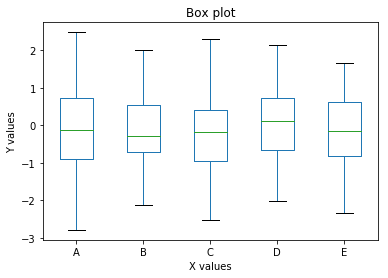

In [50]:
df = pd.DataFrame(np.random.normal(size=(100,5)), columns=list('ABCDE'))
df.plot(kind='box', return_type='axes')

plt.title('Box plot')
plt.ylabel('Y values')
plt.xlabel('X values')
# plt.show()
plt.savefig('boxplot.png')